In [1]:
import pandas as pd

# For EDA
import matplotlib.pyplot as plt
import seaborn as sns

# For Data Preprocessing
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Regression Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Boosting Techniques
from xgboost import XGBRegressor
import lightgbm as lgb

# For Model Evaluation
from sklearn.metrics import mean_absolute_error

%matplotlib inline

In [2]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <a list of 10 Patch objects>)

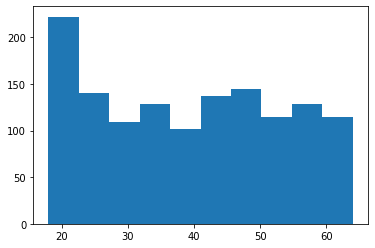

In [6]:
plt.hist(data.age)

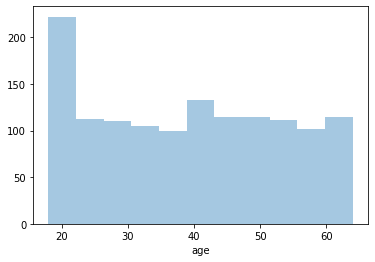

In [7]:
sns.distplot(data.age, kde=False)

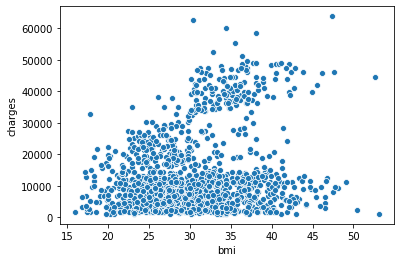

In [8]:
x = data.bmi
y = data.charges

sns.scatterplot(x=x, y=y)

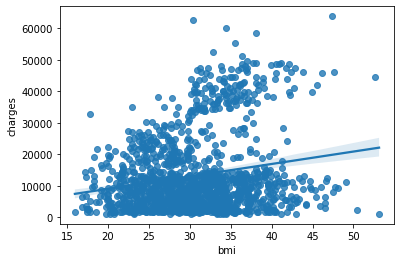

In [9]:
sns.regplot(x=x, y=y)

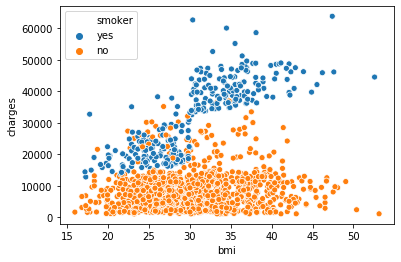

In [10]:
sns.scatterplot(x=x, y=y, hue=data.smoker)

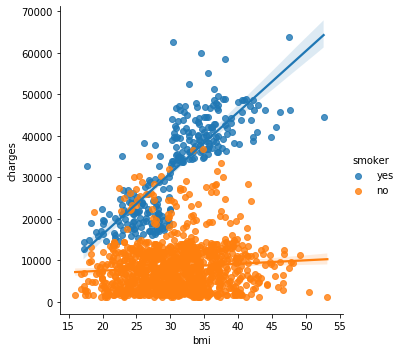

In [11]:
sns.lmplot(x='bmi', y='charges', hue='smoker', data=data)

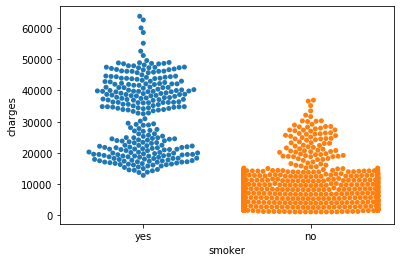

In [12]:
sns.swarmplot(x=data.smoker, y=y)

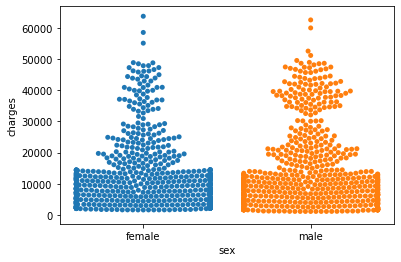

In [13]:
sns.swarmplot(x=data.sex, y=y)

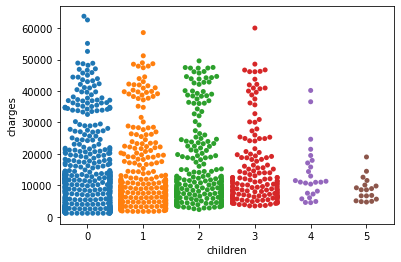

In [14]:
sns.swarmplot(x=data.children, y=y)

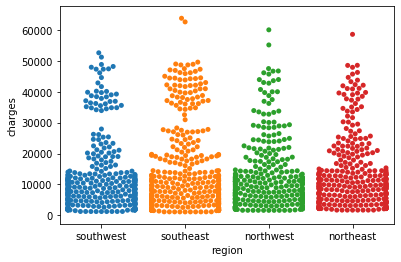

In [15]:
sns.swarmplot(x=data.region, y=y)

In [16]:
cat_data = data.select_dtypes('object')
cat_data.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [17]:
num_data = data.select_dtypes(exclude=['object'])
num_data.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [18]:
encoder_one = LabelEncoder()

In [19]:
enc_data = cat_data.apply(encoder_one.fit_transform)
enc_data.head()

,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2
3,1,0,1
4,1,0,1


In [20]:
new_data = enc_data.join(num_data)
new_data.head()

,sex,smoker,region,age,bmi,children,charges
0,0,1,3,19,27.900,0,16884.92400
1,1,0,2,18,33.770,1,1725.55230
2,1,0,2,28,33.000,3,4449.46200
3,1,0,1,33,22.705,0,21984.47061
4,1,0,1,32,28.880,0,3866.85520


In [21]:
features = new_data.columns.drop('charges')
features

Index(['sex', 'smoker', 'region', 'age', 'bmi', 'children'], dtype='object')

In [22]:
y = new_data.charges
X = new_data.drop(['charges'], axis=1)

In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=12)

# DecisionTree

In [24]:
model_one = DecisionTreeRegressor()
model_one.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [25]:
preds_dt = model_one.predict(X_valid)
mae = mean_absolute_error(preds_dt, y_valid)
print('The MAE for DEcisionTRee : ')
print('>>>>>>: ', mae)

The MAE for DEcisionTRee : 
>>>>>>:  2879.5671264925377


# RandomFOrest

In [26]:
model_two = RandomForestRegressor()
model_two.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [27]:
preds_rf = model_two.predict(X_valid)
mae = mean_absolute_error(preds_rf, y_valid)
print('The MAE for RandoMForeST : ')
print('>>>>>>: ', mae)

The MAE for RandoMForeST : 
>>>>>>:  2671.4430862756335


# SupportVector

In [28]:
model_three = SVR()
model_three.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [29]:
preds_sv = model_three.predict(X_valid)
mae = mean_absolute_error(preds_sv, y_valid)
print('The MAE for SUppoRtVectoR: ')
print('>>>>>>>: ', mae)

The MAE for SUppoRtVectoR: 
>>>>>>>:  7851.024008047883


# KNeighbors

# XGBoost

In [30]:
model_four = XGBRegressor(learning_rate=0.05)
model_four.fit(X_train, y_train)

C:\AnaInst\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:13:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [31]:
preds_xgb = model_four.predict(X_valid)
mae = mean_absolute_error(preds_xgb, y_valid)
print('The MAE for XGBoost: ')
print('>>>>>>>: ', mae)

The MAE for XGBoost: 
>>>>>>>:  2648.3940715534627


# LighGBM

In [32]:
param = {'num_leaves': 33, 'metric': 'mean_absolute_error'}
num_rounds = 550

In [33]:
dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_valid, y_valid)

In [35]:
model_five = lgb.train(param, dtrain, num_rounds, valid_sets=[dvalid], early_stopping_rounds=20)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000440 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 6
[LightGBM] [Info] Start training from score 13313.940770
[1]	valid_0's l1: 8166.65
Training until validation scores don't improve for 20 rounds
[2]	valid_0's l1: 7562.9
[3]	valid_0's l1: 7018.98
[4]	valid_0's l1: 6540.43
[5]	valid_0's l1: 6105.8
[6]	valid_0's l1: 5722.24
[7]	valid_0's l1: 5371.11
[8]	valid_0's l1: 5062.08
[9]	valid_0's l1: 4793.39
[10]	valid_0's l1: 4544.87
[11]	valid_0's l1: 4311.62
[12]	valid_0's l1: 4117.51
[13]	valid_0's l1: 3954.18
[14]	valid_0's l1: 3797.33
[15]	valid_0's l1: 3656.3
[16]	valid_0's l1: 3534.08
[17]	valid_0's l1: 3419.57
[18]	valid_0's l1: 3309.7
[19]	valid_0's l1: 3226.37
[20]	valid_0's l1: 3155.24
[21]	valid_0's l1: 3091.79
[22]	valid_0's l1: 3035.68
[23]	valid_0